# 0. Introduction

## Overview of Image Compression

In today’s digital age, the proliferation of high-resolution images and videos has led to an increasing demand for efficient storage and transmission methods. Image compression plays a crucial role in reducing the file size of images without significantly compromising quality. This enables faster transmission over networks, efficient storage utilization, and improved performance in image processing applications.

Traditional image compression methods like JPEG have been widely used due to their simplicity and effectiveness. However, with advancements in technology and the need for higher compression ratios and better image quality, more sophisticated algorithms have been developed. This evolution has led to the creation of JPEG 2000, a more advanced image compression standard that overcomes many limitations of its predecessors (still an old algorithm).

## What is JPEG 2000?

JPEG 2000 is an image compression standard and coding system created by the Joint Photographic Experts Group (JPEG) committee in the year 2000. It was designed to provide a flexible and efficient method for compressing images, offering both lossy and lossless compression within a single unified framework.

### Key Features and Advantages

 - Wavelet-Based Compression: Unlike JPEG, which uses the Discrete Cosine Transform (DCT), JPEG 2000 employs the Discrete Wavelet Transform (DWT), leading to better compression efficiency and image quality, especially at high compression ratios.
 - Scalability: Supports progressive decoding by pixel accuracy and resolution, enabling applications to display lower-quality versions of an image while higher-quality data is still being transmitted.
 - Region of Interest (ROI) Coding: Allows certain parts of an image to be coded with higher quality than the rest, which is beneficial in applications where specific areas need to be emphasized.
 - Error Resilience: Enhanced robustness to data transmission errors, making it suitable for unreliable network environments.
 - Lossless and Lossy Compression: Provides both compression methods in a single algorithm, eliminating the need for separate processes.

### Applications and Use Cases

 - Medical Imaging: High-quality lossless compression is essential for diagnostic purposes.
 - Digital Cinema: Efficient compression without compromising image quality is critical for movie distribution.
 - Satellite and Remote Sensing: Handles large images with high resolutions effectively.
 - Archival Storage: Preservation of digital images with minimal loss in quality.

## Objectives of this Notebook

What You Will Learn

 - Understand the Core Components: Gain a comprehensive understanding of the JPEG 2000 compression pipeline, including pre-processing, transformation, quantization, and encoding.
 - Explore the Discrete Wavelet Transform: Learn how DWT differs from other transforms and why it is advantageous for image compression.
 - Implement Key Algorithms: Use Python to implement and experiment with the main algorithms used in JPEG 2000.
 - Visualize Compression Effects: Observe how different parameters affect image quality and compression efficiency through interactive visualizations.
 - Customize for Specific Data: Learn how to adapt and optimize the JPEG 2000 algorithm for different types of images and requirements.

### How the Notebook is Structured

 - Section 1-2: Introduce fundamental concepts and pre-processing steps to set the stage for the core compression techniques.
 - Section 3-5: Delve into the core components of JPEG 2000, providing both theoretical background and practical implementations.
 - Section 6-7: Discuss the reconstruction process and evaluate the performance of the compression.
 - Section 8-9: Explore advanced topics and customization options to extend your understanding and application of JPEG 2000.
 - Interactivity and Modularity: Throughout the notebook, interactive elements allow you to experiment with parameters and observe outcomes in real-time, and modular sections enable focused learning on topics of interest.

By the end of this notebook, you will have a solid understanding of how JPEG 2000 works and be equipped with practical skills to implement and customize the algorithm for various applications.

# 1. Fundamentals of JPEG 2000

## 1.1 The Compression Pipeline

JPEG 2000 introduces a sophisticated compression pipeline designed to efficiently encode images while preserving quality. The high-level stages of the pipeline are:

1. **Pre-processing**
 - Image Tiling: Splits the image into smaller, manageable tiles to reduce memory usage during processing.
 - Color Space Transformation: Converts RGB color space to a luminance-chrominance color space (like YCbCr) for better compression of color images.

2.	**Discrete Wavelet Transform (DWT)**
 Transforms the image data into wavelet coefficients, decomposing it into multiple frequency bands for efficient encoding.

3.	**Quantization**
 Reduces the precision of the wavelet coefficients to achieve compression by eliminating less significant data.

4.	**Tier-1 Coding (Bit-plane Coding)**
 Encodes the quantized coefficients using Embedded Block Coding with Optimal Truncation (EBCOT), applying context modeling and arithmetic coding.

5.	**Tier-2 Coding (Packetization)**
Organizes the encoded data into packets, enabling features like scalability and progressive decoding.

6.	**File Formatting**
Assembles the codestream with necessary headers and markers to create the final JPEG 2000 file.


Figure 1 illustrates the high-level flow of the JPEG 2000 compression process:

$${\color{red}ToDo: add \space the \space image}$$

## 1.2 Key Differences from JPEG

While both JPEG and JPEG 2000 are image compression standards, JPEG 2000 introduces significant advancements over the JPEG format.

**Technical Advancements**

 - Wavelet-Based Transformation
	- JPEG uses the Discrete Cosine Transform (DCT), which operates on fixed-size blocks.
	- JPEG 2000 employs the Discrete Wavelet Transform (DWT), providing better spatial and frequency localization without block artifacts.
 - Enhanced Quantization and Coding
	- JPEG uses uniform quantization and Huffman coding.
	- JPEG 2000 utilizes more advanced quantization techniques and arithmetic coding, improving compression efficiency.
 - Scalability and Progressive Transmission
	- JPEG supports limited progressive modes.
	- JPEG 2000 offers full scalability in resolution and quality, allowing for progressive transmission and display.
 - Region of Interest (ROI) Coding
	- JPEG does not support ROI coding.
	- JPEG 2000 allows specific regions to be encoded with higher quality without significantly increasing file size.
 - Lossless Compression Support
	- JPEG is primarily lossy.
	- JPEG 2000 supports both lossy and true lossless compression within the same framework.

**Benefits in Quality and Compression Ratio**

- Improved Image Quality at High Compression Ratios: JPEG 2000 delivers better visual quality, especially at lower bitrates, reducing artifacts commonly seen in JPEG images.
- No Blocking Artifacts: Eliminates the blockiness associated with JPEG due to its block-based DCT approach.
- Flexible File Format: The codestream syntax allows for features like random access and easy editing, which are not feasible with JPEG.

Understanding these fundamental differences sets the stage for a deeper exploration of JPEG 2000’s components and how they contribute to its superior performance in image compression.

# 2. Pre-processing Steps

In the JPEG 2000 compression pipeline, pre-processing is essential to prepare the image data for efficient compression. This section covers the key pre-processing steps:

- Image Tiling
- Color Space Transformation
- Sample Data Preparation

## 2.1 Image Tiling

**Concept and Purpose of Tiling** 

Image tiling involves dividing an image into smaller rectangular blocks called tiles. Each tile is processed independently through the compression pipeline. Tiling offers several benefits:

- **Memory Efficiency**: Processing smaller tiles reduces memory usage, which is crucial for large images.
- **Parallel Processing**: Tiles can be processed in parallel, leveraging multi-core processors for faster computations.
- **Localized Processing**: Enhances caching efficiency and allows for localized image processing.

By default, if tiling is not applied, the entire image is treated as a single tile.

**Effects on Memory and Processing**

- Reduced Memory Footprint: Smaller tiles mean less data in memory at any given time.
- Processing Overhead: Excessive tiling may introduce overhead and reduce compression efficiency due to the loss of correlation between tiles.
- Edge Artifacts: Proper handling is required to prevent artifacts at tile boundaries.

**Python Implementation**
Let’s implement a function to divide an image into tiles.

In [3]:
import numpy as np

def image_tiling(image, tile_size):
    """
    Splits an image into tiles of specified size.

    Parameters:
    - image: numpy.ndarray
        The input image array (H x W x C).
    - tile_size: tuple
        A tuple (tile_height, tile_width) specifying the size of each tile.

    Returns:
    - tiles: list of numpy.ndarray
        A list containing the image tiles.
    """
    tiles = []
    img_height, img_width = image.shape[:2]
    tile_height, tile_width = tile_size

    # Calculate the number of tiles needed in each dimension
    n_tiles_y = (img_height + tile_height - 1) // tile_height
    n_tiles_x = (img_width + tile_width - 1) // tile_width

    for i in range(n_tiles_y):
        for j in range(n_tiles_x):
            # Calculate the start and end indices for the current tile
            y_start = i * tile_height
            y_end = min((i + 1) * tile_height, img_height)
            x_start = j * tile_width
            x_end = min((j + 1) * tile_width, img_width)

            # Extract the tile from the image
            tile = image[y_start:y_end, x_start:x_end, :]
            tiles.append(tile)
    return tiles

Original Image Size: 512 x 512 (Height x Width)


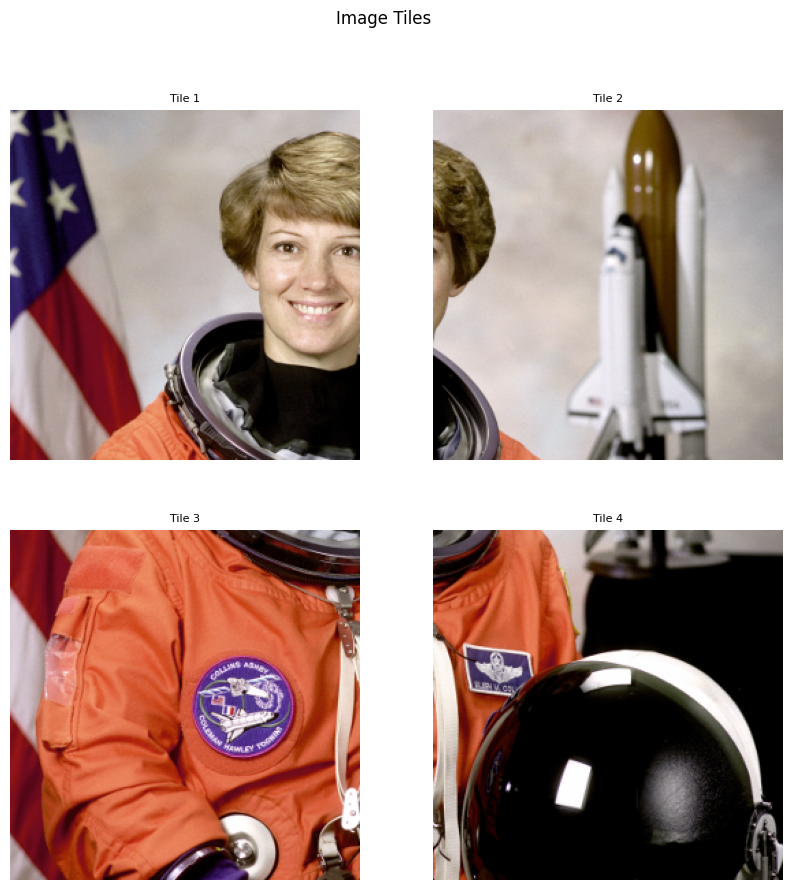

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Load an example image
image = data.astronaut()  # Returns an RGB image

# Print the size of the original image
print(f"Original Image Size: {image.shape[0]} x {image.shape[1]} (Height x Width)")

# Define tile size (e.g., 256x256 pixels)
tile_size = (256, 256)

# Apply image tiling
tiles = image_tiling(image, tile_size)

# Calculate the number of tiles in each dimension
img_height, img_width = image.shape[:2]
tile_height, tile_width = tile_size
n_tiles_y = (img_height + tile_height - 1) // tile_height
n_tiles_x = (img_width + tile_width - 1) // tile_width

# Display the tiles in a grid with tile numbers
fig, axes = plt.subplots(n_tiles_y, n_tiles_x, figsize=(10, 10))
for i in range(n_tiles_y):
    for j in range(n_tiles_x):
        tile_index = i * n_tiles_x + j
        if tile_index < len(tiles):
            axes[i, j].imshow(tiles[tile_index])
            axes[i, j].axis('off')
            # Add tile number as a subtitle
            axes[i, j].set_title(f'Tile {tile_index + 1}', fontsize=8)
        else:
            axes[i, j].axis('off')  # Hide unused subplots if any

plt.suptitle('Image Tiles')
plt.show()

## 2.2 Color Space Transformation

**From RGB to YCbCr**

Color images are commonly represented in the RGB (Red, Green, Blue) color space. For compression, it’s beneficial to transform the image into a color space that separates luminance from chrominance components, such as YCbCr.

- Y: Luminance (brightness information)
- Cb: Chrominance-blue (color difference between blue and luminance)
- Cr: Chrominance-red (color difference between red and luminance)

This transformation takes advantage of the human visual system’s higher sensitivity to luminance than chrominance, allowing for better compression by allocating more bits to luminance information.

**Why Color Transformation is Used?**

- Compression Efficiency: Separating luminance and chrominance enables differential compression strategies.
- Perceptual Optimization: Aligns with human vision, reducing noticeable artifacts.

**Python Implementation**: Here is a Python function to convert between RGB and YCbCr color spaces based on the ITU-R BT.601 standard.

In [5]:
def rgb_to_ycbcr(image):
    """
    Converts an RGB image to YCbCr color space.

    Parameters:
    - image: numpy.ndarray
        The input RGB image array (H x W x 3).

    Returns:
    - ycbcr_image: numpy.ndarray
        The image in YCbCr color space.
    """
    image = image.astype(np.float32) / 255.0  # Normalize to [0,1]

    # Define transformation matrix
    transformation_matrix = np.array([
        [  65.481, 128.553,  24.966],
        [ -37.797, -74.203, 112.0  ],
        [ 112.0  , -93.786, -18.214]
    ]) / 255.0

    # Apply the transformation
    ycbcr_image = np.dot(image, transformation_matrix.T)
    ycbcr_image[:, :, 0] += 16.0 / 255.0    # Add offset to Y channel
    ycbcr_image[:, :, 1:] += 128.0 / 255.0  # Add offset to Cb and Cr channels

    return ycbcr_image

In [6]:
def ycbcr_to_rgb(ycbcr_image):
    """
    Converts a YCbCr image back to RGB color space.

    Parameters:
    - ycbcr_image: numpy.ndarray
        The input YCbCr image array (H x W x 3).

    Returns:
    - rgb_image: numpy.ndarray
        The image in RGB color space.
    """
    ycbcr_image = ycbcr_image.copy()
    ycbcr_image[:, :, 0] -= 16.0 / 255.0    # Remove offset from Y channel
    ycbcr_image[:, :, 1:] -= 128.0 / 255.0  # Remove offset from Cb and Cr channels

    # Define inverse transformation matrix
    inverse_matrix = np.array([
        [298.082,    0.0    , 408.583],
        [298.082, -100.291, -208.120],
        [298.082,  516.411,    0.0  ]
    ]) / 255.0

    # Apply the inverse transformation
    rgb_image = np.dot(ycbcr_image, inverse_matrix.T)
    rgb_image = np.clip(rgb_image, 0.0, 1.0)
    rgb_image = (rgb_image * 255).astype(np.uint8)

    return rgb_image

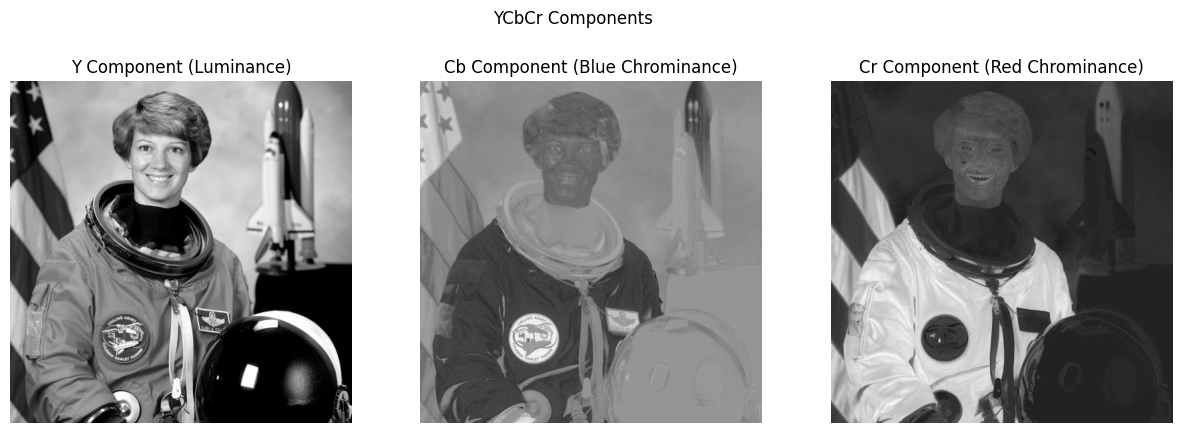

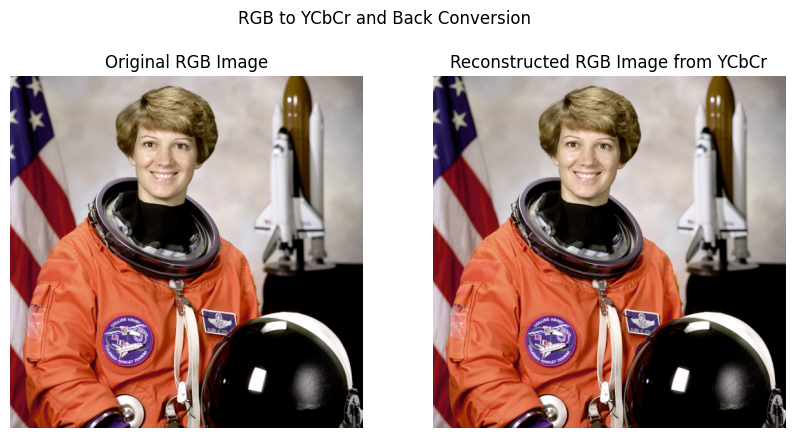

In [7]:
# Convert the image to YCbCr color space
ycbcr_image = rgb_to_ycbcr(image)

# Display the Y, Cb, and Cr components separately
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(ycbcr_image[:, :, 0], cmap='gray')
axes[0].axis('off')
axes[0].set_title('Y Component (Luminance)')

axes[1].imshow(ycbcr_image[:, :, 1], cmap='gray')
axes[1].axis('off')
axes[1].set_title('Cb Component (Blue Chrominance)')

axes[2].imshow(ycbcr_image[:, :, 2], cmap='gray')
axes[2].axis('off')
axes[2].set_title('Cr Component (Red Chrominance)')

plt.suptitle('YCbCr Components')
plt.show()

# Convert the YCbCr image back to RGB color space
reconstructed_rgb_image = ycbcr_to_rgb(ycbcr_image)

# Display the original and reconstructed images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Original RGB Image')

axes[1].imshow(reconstructed_rgb_image)
axes[1].axis('off')
axes[1].set_title('Reconstructed RGB Image from YCbCr')

plt.suptitle('RGB to YCbCr and Back Conversion')
plt.show()

## 2.3 Sample Data Preparation

**Normalization and Data Types**

Before applying the wavelet transform and subsequent compression steps, the image data must be prepared:

- **Normalization**: Scaling pixel values to a standard range (e.g., [-0.5, 0.5]) ensures numerical stability and consistency.
- **Data Types**: Converting data to float32 for precise computations.

**Padding and Edge Handling**

Processing techniques like wavelet transforms may require the image dimensions to be multiples of certain values.

- Padding: Extends the image dimensions to the nearest multiple required by the processing algorithm.
- Edge Handling: Methods include zero-padding, symmetric padding, or constant values to handle image borders.

**Python Implementation**: Let's implement simple versions of these preprocessing steps

In [8]:
def sample_data_preparation(image, normalize_range=(-0.5, 0.5)):
    """
    Prepares image data by normalizing and converting data types.

    Parameters:
    - image: numpy.ndarray
        The input image array (H x W).

    Returns:
    - prepared_image: numpy.ndarray
        The processed image array.
    """
    # Convert to float32
    image = image.astype(np.float32)

    # # Normalize to [0,1]
    # image /= 255.0

    # Normalize to desired range
    min_val, max_val = normalize_range
    prepared_image = image * (max_val - min_val) + min_val

    return prepared_image

In [9]:
def pad_image(image, block_size):
    """
    Pads the image so its dimensions are multiples of block_size.

    Parameters:
    - image: numpy.ndarray
        The input image array (H x W).
    - block_size: int
        The block size to pad to.

    Returns:
    - padded_image: numpy.ndarray
        The padded image array.
    """
    height, width = image.shape[:2]
    pad_height = (block_size - (height % block_size)) % block_size
    pad_width = (block_size - (width % block_size)) % block_size

    padded_image = np.pad(
        image,
        ((0, pad_height), (0, pad_width)),
        mode='reflect'  # Using symmetric padding
    )
    return padded_image

Original Y Component | Shape: (512, 512), Range: [0.06, 0.92]
Normalized Y Component | Shape: (512, 512), Range: [-0.44, 0.42]
Padded Y Component | Shape: (520, 520), Range: [-0.44, 0.42]


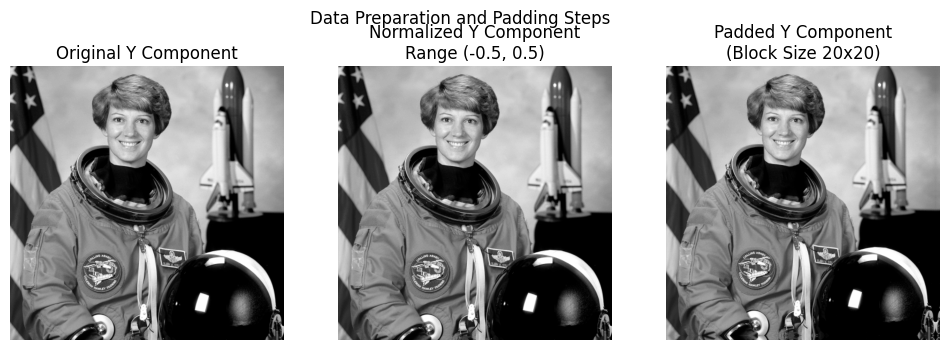

In [10]:
# Extract the Y (luminance) component to show how the preparation steps work
Y_component = ycbcr_image[:, :, 0]

# Step 1: Display the original Y component with its range and size
print(f"Original Y Component | Shape: {Y_component.shape}, Range: [{Y_component.min():.2f}, {Y_component.max():.2f}]")
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(Y_component, cmap='gray')
plt.axis('off')
plt.title('Original Y Component')

# Step 2: Prepare the Y component (normalize to range [-0.5, 0.5])
normalize_range = (-0.5, 0.5)
Y_prepared = sample_data_preparation(Y_component, normalize_range=normalize_range)

# Print details after normalization
print(f"Normalized Y Component | Shape: {Y_prepared.shape}, Range: [{Y_prepared.min():.2f}, {Y_prepared.max():.2f}]")
plt.subplot(1, 3, 2)
plt.imshow(Y_prepared, cmap='gray')
plt.axis('off')
plt.title(f'Normalized Y Component\nRange {normalize_range}')

# Step 3: Pad the image to be a multiple of the block size
block_size = 20  # Note that 20 is not a good choice, use multiples of 2
Y_padded = pad_image(Y_prepared, block_size)

# Print details after padding
print(f"Padded Y Component | Shape: {Y_padded.shape}, Range: [{Y_padded.min():.2f}, {Y_padded.max():.2f}]")
plt.subplot(1, 3, 3)
plt.imshow(Y_padded, cmap='gray')
plt.axis('off')
plt.title(f'Padded Y Component\n(Block Size {block_size}x{block_size})')

plt.suptitle('Data Preparation and Padding Steps')
plt.show()

# 3. Discrete Wavelet Transform (DWT)

The Discrete Wavelet Transform (DWT) is a core component of the JPEG 2000 compression algorithm. It transforms the spatial domain image data into a frequency domain representation, enabling efficient compression by concentrating energy into a few significant coefficients.

## 3.1 Introduction to Wavelets

**What are Wavelets?**

Wavelets are mathematical functions that divide data into different frequency components and analyze each component with a resolution matched to its scale. Unlike traditional Fourier transforms, which use sinusoids extending over infinite time, wavelets are localized in both time (or space) and frequency.

**Key Characteristics**:

- Localization: Wavelets are localized in space and frequency, making them suitable for analyzing transient or non-stationary signals.
- Multi-Resolution Analysis: Wavelets provide a hierarchical framework, allowing analysis at various levels of detail.

**Why Use Wavelets in Image Compression?**

- Efficient Energy Compaction: Wavelets concentrate most of the signal’s energy into a few large coefficients, making it easier to compress data effectively.
- No Blocking Artifacts: Unlike block-based transforms (e.g., DCT in JPEG), wavelets do not introduce blocking artifacts.
- Scalability: Wavelet transforms enable progressive transmission and decoding, supporting features like resolution scalability.

**Comparison with Fourier Transform and DCT**

| Feature |	Fourier Transform |	Discrete Cosine Transform (DCT) |	Discrete Wavelet Transform (DWT) |
| -- | -- | -- | -- |
| Localization |	Frequency only |	Frequency only (block-based) |	Both space and frequency |
| Basis Functions |	Sinusoids |	Cosine functions | Scaled and shifted wavelets |
| Block Artifacts |	N/A |	May occur due to block processing |	None |
| Multi-Resolution Analysis |	No |	Limited (via block sizes) |	Yes |


## 3.2 DWT in JPEG 2000

**Types of Wavelets Used**: JPEG 2000 employs two main types of wavelet filters:

- Daubechies 9/7 Tap Filters (Biorthogonal 9/7): Used for lossy compression due to their excellent energy compaction properties.
- Le Gall 5/3 Tap Filters (Biorthogonal 5/3): Used for lossless compression since they can be implemented with integer operations.

**Multi-Level Decomposition and Sub-Bands**: The DWT decomposes the image into multiple levels, each consisting of four sub-bands:

- LL (Low-Low): Approximation coefficients (low frequency in both dimensions).
- LH (Low-High): Horizontal details (low frequency vertically, high frequency horizontally).
- HL (High-Low): Vertical details (high frequency vertically, low frequency horizontally).
- HH (High-High): Diagonal details (high frequency in both dimensions).

Each subsequent level operates on the *LL sub-band* from the previous level, allowing for a hierarchical representation.

Figure 2: Multi-Level DWT Decomposition

$${\color{red} ToDo }$$ 
Insert a diagram showing multi-level DWT decomposition.

**Applying DWT in JPEG 2000**

- Forward Transform: The image data is passed through a series of low-pass and high-pass filters, followed by downsampling, to produce the wavelet coefficients.
- Number of Levels: The number of decomposition levels depends on the image size and desired compression ratio.
- Edge Handling: Symmetric extension is typically used to handle image borders, avoiding artifacts.

## 3.3 Python Implementation

We’ll run the DWT using both the PyWavelets library and a custom implementation for educational purposes. First lets use `PyWavelets` libary. In this library,

- For Lossy Compression: Use 'bior4.4' (approximates the Daubechies 9/7 wavelet).
- For Lossless Compression: Use 'bior2.2' (approximates the Le Gall 5/3 wavelet).

**Example Usage**

You can use the pre-processed image tile `Y_padded` from the previous section or as I do here, let's generate a new image and apply wavelet on it:

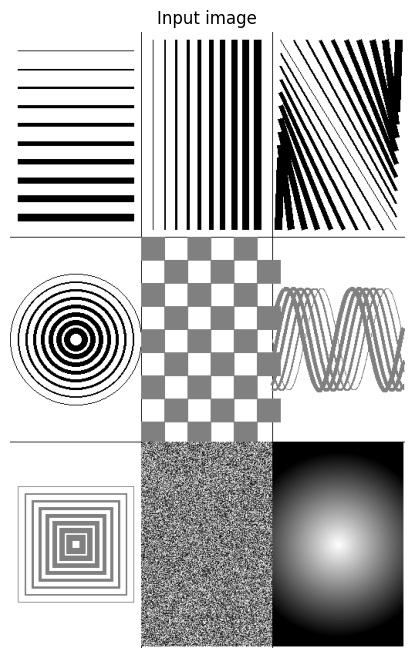

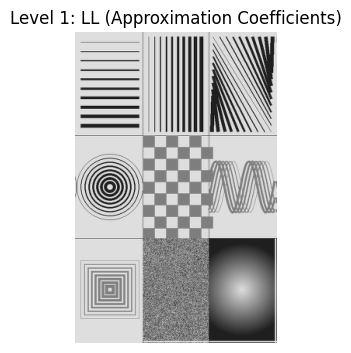

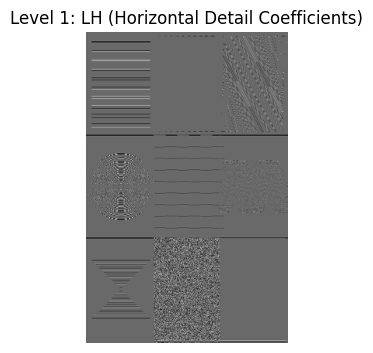

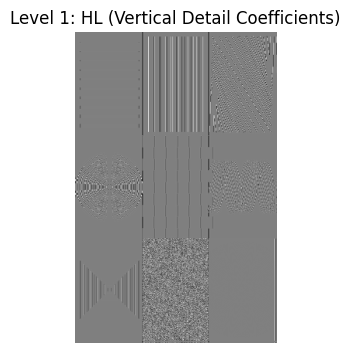

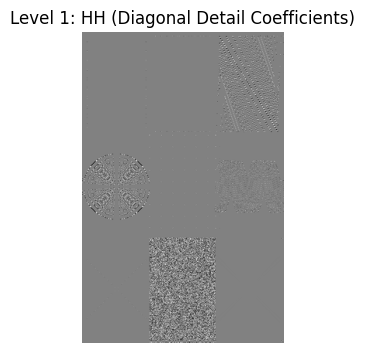

In [4]:
import pywt
import matplotlib.pylab as plt
from utils import visualize_coeffs, visualize_coeffs_2D, create_pattern_image


#image = pywt.data.camera()
image = create_pattern_image(save_dir='.', image_width=512, image_height=800, grayscale=True)
base_figsize = 8

figsize = (base_figsize, base_figsize)
plt.figure(figsize=figsize)
plt.imshow(image, cmap='gray')
plt.title(f'Input image')
plt.axis('off')
plt.show()

# Perform multi-level 2D Discrete Wavelet Transform
# Set number of levels for decomposition
n_levels = 1 
#The type of wavelet to use (e.g., 'bior4.4' for 9/7, 'bior2.2' for 5/3).
wavelet = 'bior4.4'
coefficients = pywt.wavedec2(image, wavelet, level=n_levels)

visualize_coeffs(coefficients, n_levels, image.shape, base_figsize)

When visualizing these coefficients, we usually arrange the subbands in a 2D array the same size as the input image in which:

- LL (Low-Low) is positioned in the top left corner. This sub-band contains the low-frequency (coarse) components of the image, representing the overall average information—a smaller, smoothed version of the original image.
- HH (High-High) occupies the bottom right corner. This sub-band, known as the Diagonal Detail Coefficients, captures diagonal edges and details, focusing on variations along both rows and columns.
- HL (High-Low) is placed in the top right corner. The Horizontal Detail Coefficients capture high-frequency components in the horizontal direction, highlighting vertical edges and details.
- LH (Low-High) appears in the bottom left corner. These Vertical Detail Coefficients capture high-frequency components in the vertical direction, emphasizing horizontal edges and details.

By visualizing the coefficients in this layout, we gain insight into how different levels of detail and directional features are preserved and separated by the wavelet transform, enabling targeted compression of image components based on their perceptual significance. Let's look them using a helper function:

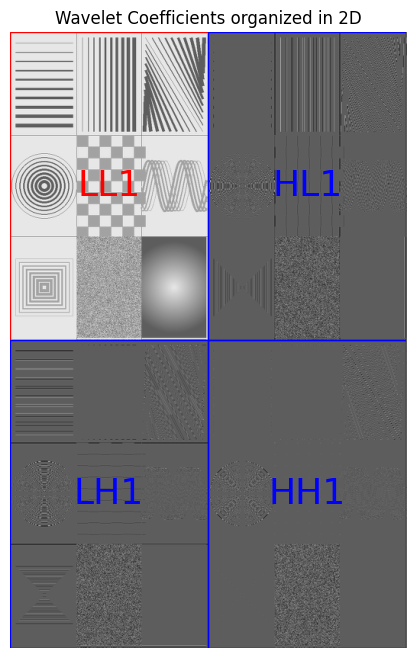

In [5]:
visualize_coeffs_2D(coefficients, n_levels)